In [28]:
import geopandas as gpd
import pandas as pd
import json
import maup
pd.set_option('display.max_columns', None)

Importing Data

In [29]:
precinct_boundaries = gpd.read_file('data/Arizona/test2/tl_2020_04_vtd20.shp')
us_hor_results = pd.read_csv('data/US/2020-HOUSE-precinct-general.csv')
racial_demographics = pd.read_csv('data/Arizona/demographic_data/DECENNIALPL2020.P2-Data.csv')
current_districting = gpd.read_file('data/Arizona/current_districting/Approved_Official_Congressional_Map.shp')
display(precinct_boundaries)
display(us_hor_results)
display(racial_demographics)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,04,015,000209,04015000209,A,DOLAN SPRINGS,DOLAN SPRINGS,00,G5240,N,1078514631,13521744,+35.5860652,-114.3691267,"POLYGON ((-114.68948 35.65137, -114.68910 35.6..."
1,04,015,000211,04015000211,A,BULLHEAD CITY,BULLHEAD CITY,00,G5240,N,751754370,36557270,+35.2828824,-114.4775066,"POLYGON ((-114.66399 35.45347, -114.66393 35.4..."
2,04,015,000221,04015000221,A,LITTLEFIELD,LITTLEFIELD,00,G5240,N,9916323424,24510948,+36.4832895,-113.5600846,"POLYGON ((-114.05062 37.00017, -114.05005 37.0..."
3,04,015,000223,04015000223,A,MOCCASIN,MOCCASIN,00,G5240,N,452107869,19920,+36.9097094,-112.6673019,"POLYGON ((-112.82950 37.00052, -112.82380 37.0..."
4,04,015,000216,04015000216,A,KINGMAN NORTH,KINGMAN NORTH,00,G5240,N,72692554,0,+35.2886269,-114.0480868,"POLYGON ((-114.11265 35.27706, -114.11252 35.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,04,012,000060,04012000060,A,60,60,00,G5240,N,1958542358,2542412,+33.3669834,-114.4562522,"POLYGON ((-114.62337 33.45526, -114.62292 33.4..."
1534,04,012,000052,04012000052,A,52,52,00,G5240,N,787700919,7103719,+33.8749524,-114.3598873,"POLYGON ((-114.53587 33.92871, -114.53583 33.9..."
1535,04,012,000051,04012000051,A,51,51,00,G5240,N,197633999,2214913,+34.0883128,-114.2811834,"POLYGON ((-114.43418 34.08738, -114.43338 34.0..."
1536,04,012,000054,04012000054,A,54,54,00,G5240,N,879165028,4271949,+34.2108842,-113.9017783,"POLYGON ((-114.22902 34.18743, -114.22703 34.1..."


,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,candidate,district,magnitude,dataverse,year,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
0,1ST BAPTIST CH SATSUMA,US HOUSE,NaN,NaN,TOTAL,2,MOBILE,1097.0,MOBILE,1097.0,OVERVOTES,1,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,1,63,41,2020-11-03,False
1,1ST BAPTIST CH SATSUMA,US HOUSE,NaN,NaN,TOTAL,40,MOBILE,1097.0,MOBILE,1097.0,UNDERVOTES,1,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,1,63,41,2020-11-03,False
2,1ST BAPTIST CH SATSUMA,US HOUSE,NaN,NaN,TOTAL,6,MOBILE,1097.0,MOBILE,1097.0,WRITEIN,1,1,HOUSE,2020,GEN,ALABAMA,False,True,AL,1,63,41,2020-11-03,False
3,1ST BAPTIST CH SATSUMA,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,482,MOBILE,1097.0,MOBILE,1097.0,JAMES AVERHART,1,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,1,63,41,2020-11-03,False
4,1ST BAPTIST CH SATSUMA,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,3190,MOBILE,1097.0,MOBILE,1097.0,JERRY CARL,1,1,HOUSE,2020,GEN,ALABAMA,False,False,AL,1,63,41,2020-11-03,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787771,9-9,US HOUSE,NaN,NaN,TOTAL,0,CROOK,56011.0,CROOK,56011.0,WRITEIN,0,1,HOUSE,2020,GEN,WYOMING,False,True,WY,56,83,68,2020-11-03,False
787772,9-9,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,2,CROOK,56011.0,CROOK,56011.0,LYNNETTE GREY BULL,0,1,HOUSE,2020,GEN,WYOMING,False,False,WY,56,83,68,2020-11-03,False
787773,9-9,US HOUSE,LIBERTARIAN,LIBERTARIAN,TOTAL,0,CROOK,56011.0,CROOK,56011.0,RICHARD BRUBAKER,0,1,HOUSE,2020,GEN,WYOMING,False,False,WY,56,83,68,2020-11-03,False
787774,9-9,US HOUSE,CONSTITUTION PARTY,OTHER,TOTAL,0,CROOK,56011.0,CROOK,56011.0,JEFF HAGGIT,0,1,HOUSE,2020,GEN,WYOMING,False,False,WY,56,83,68,2020-11-03,False


,GEO_ID,NAME,P2_001N,P2_001NA,P2_002N,P2_002NA,P2_003N,P2_003NA,P2_004N,P2_004NA,P2_005N,P2_005NA,P2_006N,P2_006NA,P2_007N,P2_007NA,P2_008N,P2_008NA,P2_009N,P2_009NA,P2_010N,P2_010NA,P2_011N,P2_011NA,P2_012N,P2_012NA,P2_013N,P2_013NA,P2_014N,P2_014NA,P2_015N,P2_015NA,P2_016N,P2_016NA,P2_017N,P2_017NA,P2_018N,P2_018NA,P2_019N,P2_019NA,P2_020N,P2_020NA,P2_021N,P2_021NA,P2_022N,P2_022NA,P2_023N,P2_023NA,P2_024N,P2_024NA,P2_025N,P2_025NA,P2_026N,P2_026NA,P2_027N,P2_027NA,P2_028N,P2_028NA,P2_029N,P2_029NA,P2_030N,P2_030NA,P2_031N,P2_031NA,P2_032N,P2_032NA,P2_033N,P2_033NA,P2_034N,P2_034NA,P2_035N,P2_035NA,P2_036N,P2_036NA,P2_037N,P2_037NA,P2_038N,P2_038NA,P2_039N,P2_039NA,P2_040N,P2_040NA,P2_041N,P2_041NA,P2_042N,P2_042NA,P2_043N,P2_043NA,P2_044N,P2_044NA,P2_045N,P2_045NA,P2_046N,P2_046NA,P2_047N,P2_047NA,P2_048N,P2_048NA,P2_049N,P2_049NA,P2_050N,P2_050NA,P2_051N,P2_051NA,P2_052N,P2_052NA,P2_053N,P2_053NA,P2_054N,P2_054NA,P2_055N,P2_055NA,P2_056N,P2_056NA,P2_057N,P2_057NA,P2_058N,P2_058NA,P2_059N,P2_059NA,P2_060N,P2_060NA,P2_061N,P2_061NA,P2_062N,P2_062NA,P2_063N,P2_063NA,P2_064N,P2_064NA,P2_065N,P2_065NA,P2_066N,P2_066NA,P2_067N,P2_067NA,P2_068N,P2_068NA,P2_069N,P2_069NA,P2_070N,P2_070NA,P2_071N,P2_071NA,P2_072N,P2_072NA,P2_073N,P2_073NA,Unnamed: 148
0,Geography,Geographic Area Name,!!Total:,Annotation of !!Total:,!!Total:!!Hispanic or Latino,Annotation of !!Total:!!Hispanic or Latino,!!Total:!!Not Hispanic or Latino:,Annotation of !!Total:!!Not Hispanic or Latino:,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !!Total:!!Not Hispanic or Latin...,!!Total:!!Not Hispanic or Latino:!!Population...,Annotation of !

Declare Constants

In [30]:
SEATS = 9
display(precinct_boundaries)
#display(us_hor_results)
#display(racial_demographics)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,04,015,000209,04015000209,A,DOLAN SPRINGS,DOLAN SPRINGS,00,G5240,N,1078514631,13521744,+35.5860652,-114.3691267,"POLYGON ((-114.68948 35.65137, -114.68910 35.6..."
1,04,015,000211,04015000211,A,BULLHEAD CITY,BULLHEAD CITY,00,G5240,N,751754370,36557270,+35.2828824,-114.4775066,"POLYGON ((-114.66399 35.45347, -114.66393 35.4..."
2,04,015,000221,04015000221,A,LITTLEFIELD,LITTLEFIELD,00,G5240,N,9916323424,24510948,+36.4832895,-113.5600846,"POLYGON ((-114.05062 37.00017, -114.05005 37.0..."
3,04,015,000223,04015000223,A,MOCCASIN,MOCCASIN,00,G5240,N,452107869,19920,+36.9097094,-112.6673019,"POLYGON ((-112.82950 37.00052, -112.82380 37.0..."
4,04,015,000216,04015000216,A,KINGMAN NORTH,KINGMAN NORTH,00,G5240,N,72692554,0,+35.2886269,-114.0480868,"POLYGON ((-114.11265 35.27706, -114.11252 35.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,04,012,000060,04012000060,A,60,60,00,G5240,N,1958542358,2542412,+33.3669834,-114.4562522,"POLYGON ((-114.62337 33.45526, -114.62292 33.4..."
1534,04,012,000052,04012000052,A,52,52,00,G5240,N,787700919,7103719,+33.8749524,-114.3598873,"POLYGON ((-114.53587 33.92871, -114.53583 33.9..."
1535,04,012,000051,04012000051,A,51,51,00,G5240,N,197633999,2214913,+34.0883128,-114.2811834,"POLYGON ((-114.43418 34.08738, -114.43338 34.0..."
1536,04,012,000054,04012000054,A,54,54,00,G5240,N,879165028,4271949,+34.2108842,-113.9017783,"POLYGON ((-114.22902 34.18743, -114.22703 34.1..."


Exploratory Data Analysis

In [31]:
display(racial_demographics[racial_demographics['NAME'].str.contains('VotingPrecinct')].head())
#display(precinct_boundaries[precinct_boundaries['CDE_COUNTY'] == 'YU'].head())
#Yuma county has an irregular naming convention

,GEO_ID,NAME,P2_001N,P2_001NA,P2_002N,P2_002NA,P2_003N,P2_003NA,P2_004N,P2_004NA,P2_005N,P2_005NA,P2_006N,P2_006NA,P2_007N,P2_007NA,P2_008N,P2_008NA,P2_009N,P2_009NA,P2_010N,P2_010NA,P2_011N,P2_011NA,P2_012N,P2_012NA,P2_013N,P2_013NA,P2_014N,P2_014NA,P2_015N,P2_015NA,P2_016N,P2_016NA,P2_017N,P2_017NA,P2_018N,P2_018NA,P2_019N,P2_019NA,P2_020N,P2_020NA,P2_021N,P2_021NA,P2_022N,P2_022NA,P2_023N,P2_023NA,P2_024N,P2_024NA,P2_025N,P2_025NA,P2_026N,P2_026NA,P2_027N,P2_027NA,P2_028N,P2_028NA,P2_029N,P2_029NA,P2_030N,P2_030NA,P2_031N,P2_031NA,P2_032N,P2_032NA,P2_033N,P2_033NA,P2_034N,P2_034NA,P2_035N,P2_035NA,P2_036N,P2_036NA,P2_037N,P2_037NA,P2_038N,P2_038NA,P2_039N,P2_039NA,P2_040N,P2_040NA,P2_041N,P2_041NA,P2_042N,P2_042NA,P2_043N,P2_043NA,P2_044N,P2_044NA,P2_045N,P2_045NA,P2_046N,P2_046NA,P2_047N,P2_047NA,P2_048N,P2_048NA,P2_049N,P2_049NA,P2_050N,P2_050NA,P2_051N,P2_051NA,P2_052N,P2_052NA,P2_053N,P2_053NA,P2_054N,P2_054NA,P2_055N,P2_055NA,P2_056N,P2_056NA,P2_057N,P2_057NA,P2_058N,P2_058NA,P2_059N,P2_059NA,P2_060N,P2_060NA,P2_061N,P2_061NA,P2_062N,P2_062NA,P2_063N,P2_063NA,P2_064N,P2_064NA,P2_065N,P2_065NA,P2_066N,P2_066NA,P2_067N,P2_067NA,P2_068N,P2_068NA,P2_069N,P2_069NA,P2_070N,P2_070NA,P2_071N,P2_071NA,P2_072N,P2_072NA,P2_073N,P2_073NA,Unnamed: 148
1496,7000000US04027000P01,"VotingPrecinct 01, Yuma County, Arizona",3304,NaN,2533,NaN,771,NaN,710,NaN,520,NaN,115,NaN,51,NaN,5,NaN,2,NaN,17,NaN,61,NaN,57,NaN,11,NaN,19,NaN,2,NaN,2,NaN,16,NaN,5,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,3,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1497,7000000US04027000P02,"VotingPrecinct 02, Yuma County, Arizona",3006,NaN,2195,NaN,811,NaN,764,NaN,612,NaN,77,NaN,25,NaN,18,NaN,2,NaN,30,NaN,47,NaN,43,NaN,11,NaN,12,NaN,12,NaN,0,NaN,5,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,NaN,2,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1498,7000000US04027000P03,"VotingPrecinct 03, Yuma County, Arizona",4816,NaN,3791,NaN,1025,NaN,971,NaN,835,NaN,54,NaN,57,NaN,13,NaN,0,NaN,12,NaN,54,NaN,49,NaN,7,NaN,29,NaN,0,NaN,1,NaN,10,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,3,NaN,2,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1499,7000000US04027000P04,"VotingPrecinct 04, Yuma County, Arizona",8459,NaN,6661,NaN,1798,NaN,1705,NaN,1405,NaN,106,NaN,45,NaN,113,NaN,8,NaN,28,NaN,93,NaN,90,NaN,27,NaN,26,NaN,11,NaN,3,NaN,15,NaN,3,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,0,NaN,3,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1500,7000000US04027000P05,"VotingPrecinct 05, Yuma County, Arizona",4648,NaN,2670,NaN,1978,NaN,1838,NaN,1461,NaN,90,NaN,22,NaN,231,NaN,18,NaN,16,NaN,140,NaN,134,NaN,22,NaN,25,NaN,31,NaN,11,NaN,30,NaN,3,NaN,4,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,6,NaN,0,NaN,1,NaN,6,NaN,2,NaN,0,NaN,0,NaN,0,NaN,3,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN


In [32]:
#display(precinct_boundaries[precinct_boundaries['CDE_COUNTY'].str.contains('PM')].head(50))
us_hor_results['county_name'] = us_hor_results['county_name'].fillna('na')
#display(us_hor_results[us_hor_results['county_name'].str.contains('PIMA')])
#racial_demographics['county'] = racial_demographics['NAME'].apply(lambda precinct: precinct.split(',')[1])
#display(racial_demographics[racial_demographics['NAME'].str.contains('Pima')].head(50))

Boundary Data Cleaning

In [33]:
precinct_boundaries['precinct'] = precinct_boundaries['NAME20'].str.lower()
precinct_boundaries['geoid'] = precinct_boundaries['GEOID20']
final_columns = ['geoid','geometry']
precinct_boundaries = precinct_boundaries[precinct_boundaries.columns.intersection(final_columns)]

def standardize_county(precinct, county, precinct_num):
    if (county == 'PM'):
        precinct_split = precinct.split(' ')
        return precinct_split[0]+' '+precinct_split[1].rjust(3, "0")
    if(precinct == 'thatcher'):
        number = precinct_num[5:]
        return precinct + ' ' + number
    if(precinct_num == 'GM0009'):
        return 'pima g'
    if(precinct_num == 'MC0504'):
        return 'pima m'
    return precinct

#precinct_boundaries['precinct'] = precinct_boundaries.apply(lambda x: standardize_county(x.precinct, x.CDE_COUNTY, x.PCTNUM), axis=1)
#precinct_boundaries['precinct'] = precinct_boundaries['precinct'].str.replace('#','') #remove # from precincts with numbered names
precinct_boundaries['geometry'] = precinct_boundaries['geometry'].to_crs(3857)
precinct_boundaries['geometry'] = maup.close_gaps(precinct_boundaries['geometry'])
precinct_boundaries['geometry'] = maup.resolve_overlaps(precinct_boundaries['geometry'])

display(precinct_boundaries)
#display(precinct_boundaries[precinct_boundaries['precinct'].str.contains('pima')])

c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:15: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


,geometry,geoid
0,"POLYGON ((-12767174.951 4252756.034, -12767132...",04015000209
1,"POLYGON ((-12764337.461 4225677.685, -12764331...",04015000211
2,"POLYGON ((-12696056.514 4439130.190, -12695993...",04015000221
3,"POLYGON ((-12560122.887 4439178.791, -12559487...",04015000223
4,"POLYGON ((-12702961.835 4201596.146, -12702947...",04015000216
...,...,...
1533,"POLYGON ((-12759814.935 3955888.761, -12759764...",04012000060
1534,"POLYGON ((-12750074.111 4019233.348, -12750070...",04012000052
1535,"POLYGON ((-12738754.580 4040541.004, -12738665...",04012000051
1536,"POLYGON ((-12715916.465 4053996.723, -12715695...",04012000054


Voting Data Cleaning

In [34]:
us_hor_results.drop(
    ["office",'party_detailed','mode',
     'county_fips','jurisdiction_name',
     'jurisdiction_fips','candidate',
     'district','magnitude','dataverse',
     'year','stage','state','special',
     'writein','state_fips',
     'state_cen','state_ic',
     'date','readme_check'],
     axis = 1, inplace=True)
vote = us_hor_results[us_hor_results['state_po'] == 'AZ'].copy()
vote.drop(["state_po"], axis = 1, inplace=True)
vote['precinct'] = vote['precinct'].str.lower()
vote['precinct'] = vote['precinct'].str.replace('#','') #remove # from precincts with numbered names
vote.loc[vote['county_name'] == 'PIMA', 'precinct'] = 'pima ' + vote['precinct']
vote['precinct'] = vote['precinct'].str.replace('^\d+\s+', '')

#display(vote[vote['precinct'].str.contains('pima')])
display(vote[vote['precinct'].str.contains('alpine')])

C:\Users\samcs\AppData\Local\Temp\ipykernel_75144\702625009.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  vote['precinct'] = vote['precinct'].str.replace('^\d+\s+', '')


,precinct,party_simplified,votes,county_name
13005,alpine,DEMOCRAT,88,APACHE
13006,alpine,DEMOCRAT,17,APACHE
13007,alpine,DEMOCRAT,0,APACHE
13008,alpine,REPUBLICAN,186,APACHE
13009,alpine,REPUBLICAN,83,APACHE
13010,alpine,REPUBLICAN,2,APACHE


Demographic Data Cleaning

In [35]:
racial_demographics.drop([0], axis = 0, inplace=True) #drop Header row
racial_demographics['totalPop'] = racial_demographics['P2_001N'].astype(int)
racial_demographics['africanAmericanPop'] = racial_demographics['P2_006N'].astype(int)
racial_demographics['caucasianPop'] = racial_demographics['P2_005N'].astype(int)
racial_demographics['latinoPop'] = racial_demographics['P2_002N'].astype(int)
racial_demographics['asainPop'] = racial_demographics['P2_008N'].astype(int)
racial_demographics['nativeAmericanPop'] = racial_demographics['P2_007N'].astype(int)
racial_demographics['precinct'] = racial_demographics['NAME'].apply(lambda precinct: precinct.split(',')[0])
racial_demographics['county'] = racial_demographics['NAME'].apply(lambda precinct: precinct.split(',')[1])
racial_demographics['precinct'] = racial_demographics['precinct'].str.lower()
racial_demographics['precinct'] = racial_demographics['precinct'].str.replace('votingprecinct', 'yuma', regex = True)
racial_demographics['geoid'] = racial_demographics['GEO_ID'].apply(lambda precinct: precinct.split('US')[1])
final_columns = ['geoid', 'county','NAME','precinct', 'totalPop','africanAmericanPop','caucasianPop','latinoPop','asainPop', 'nativeAmericanPop']
racial_demographics = racial_demographics[racial_demographics.columns.intersection(final_columns)]
racial_demographics['precinct'] = racial_demographics['precinct'].str.replace('.','') #remove . from precincts with st.
racial_demographics['precinct'] = racial_demographics['precinct'].str.replace('#','') #remove # from precincts with numbered names
racial_demographics['precinct'] = racial_demographics['precinct'].str.replace(' voting district','') #to fix thatcher
display(racial_demographics)
#racial_demographics.to_json('data/Arizona/demoTest.json', orient = 'index', compression = 'infer', index = True, indent = 4)
#display(racial_demographics[racial_demographics['NAME'].str.contains('Pima')])

C:\Users\samcs\AppData\Local\Temp\ipykernel_75144\3570643375.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  racial_demographics['precinct'] = racial_demographics['precinct'].str.replace('.','') #remove . from precincts with st.


,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county,geoid
1,"Alpine, Apache County, Arizona",664,2,553,77,0,7,alpine,Apache County,04001000005
2,"Canyon de Chelly, Apache County, Arizona",4666,13,62,40,20,4502,canyon de chelly,Apache County,04001000010
3,"Chinle, Apache County, Arizona",2949,22,177,62,74,2552,chinle,Apache County,04001000015
4,"Concho, Apache County, Arizona",2945,6,2420,279,10,43,concho,Apache County,04001000020
5,"Cornfields, Apache County, Arizona",693,1,2,17,0,662,cornfields,Apache County,04001000025
...,...,...,...,...,...,...,...,...,...,...
1534,"VotingPrecinct 39, Yuma County, Arizona",4624,148,1430,2776,105,47,yuma 39,Yuma County,04027000P39
1535,"VotingPrecinct 40, Yuma County, Arizona",4139,94,1318,2529,63,23,yuma 40,Yuma County,04027000P40
1536,"VotingPrecinct 41, Yuma County, Arizona",4937,97,1336,3151,173,39,yuma 41,Yuma County,04027000P41
1537,"VotingPrecinct 42, Yuma County, Arizona",6615,160,1291,4770,172,35,yuma 42,Yuma County,04027000P42


In [36]:
def standardize_precinct(precinct, county):
    if ('flagstaff' in precinct):
        number = precinct[precinct.find('(')+1:precinct.find(')')]
        return 'flagstaff'+' '+number[4:]
    if (county == ' Pima County'):
        return 'pima '+ precinct.rjust(3, "0")
    if ((county == ' Graham County') & (precinct == 'pima 9')):
        return 'pima g'
    if ((county == ' Maricopa County') & (precinct == 'pima')):
        return 'pima m'
        
    return precinct

racial_demographics['precinct'] = racial_demographics.apply(lambda x: standardize_precinct(x.precinct, x.county), axis=1)

display(racial_demographics[racial_demographics['precinct'].str.contains('pima')])

,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county,geoid
209,"Pima 9 Voting District, Graham County, Arizona",4984,79,3425,1278,9,65,pima g,Graham County,04009000009
746,"PIMA, Maricopa County, Arizona",3817,57,2944,451,120,19,pima m,Maricopa County,04013000504
1076,"2, Pima County, Arizona",3039,23,1572,1104,59,186,pima 002,Pima County,04019000001
1077,"1, Pima County, Arizona",168,2,105,41,4,8,pima 001,Pima County,04019000002
1078,"142, Pima County, Arizona",418,1,2,17,0,394,pima 142,Pima County,04019000003
...,...,...,...,...,...,...,...,...,...,...
1320,"24, Pima County, Arizona",3014,91,821,1912,43,43,pima 024,Pima County,04019000245
1321,"155, Pima County, Arizona",3372,154,1355,1580,60,76,pima 155,Pima County,04019000246
1322,"156, Pima County, Arizona",738,6,155,528,5,30,pima 156,Pima County,04019000247
1323,"47, Pima County, Arizona",1657,38,100,1468,6,22,pima 047,Pima County,04019000248


Combining Data Functions

In [37]:
def total_votes(precinct, party, votes):
    #precinct_votes = votes[votes['precinct'].str.contains(precinct)]
    precinct_votes = votes[votes['precinct'] == precinct]
    precinct_votes = precinct_votes[precinct_votes['party_simplified'] == party]
    return precinct_votes['votes'].sum()

def get_precinct(precinct, votes):
    precinct_votes = votes[votes['precinct'].str.contains(precinct)]
    return precinct_votes

Combining Data

In [38]:
state = precinct_boundaries #take precinct_boundaries as base for combined precincts

In [39]:
state = state.merge(racial_demographics, left_on = 'geoid', right_on = 'geoid', how = 'left')
state = state.fillna(0)
state['totalPop'] = state['totalPop'].astype(int)
state['africanAmericanPop'] = state['africanAmericanPop'].astype(int)
state['caucasianPop'] = state['caucasianPop'].astype(int)
state['latinoPop'] = state['latinoPop'].astype(int)
state['asainPop'] = state['asainPop'].astype(int)
state['nativeAmericanPop'] = state['nativeAmericanPop'].astype(int)
display(state.head())

,geometry,geoid,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county
0,"POLYGON ((-12767174.951 4252756.034, -12767132...",04015000209,"DOLAN SPRINGS, Mohave County, Arizona",1857,16,1329,372,15,14,dolan springs,Mohave County
1,"POLYGON ((-12764337.461 4225677.685, -12764331...",04015000211,"BULLHEAD CITY, Mohave County, Arizona",41878,553,28420,9960,585,346,bullhead city,Mohave County
2,"POLYGON ((-12696056.514 4439130.190, -12695993...",04015000221,"LITTLEFIELD, Mohave County, Arizona",3175,18,2228,799,13,45,littlefield,Mohave County
3,"POLYGON ((-12560122.887 4439178.791, -12559487...",04015000223,"MOCCASIN, Mohave County, Arizona",276,6,66,16,1,178,moccasin,Mohave County
4,"POLYGON ((-12702961.835 4201596.146, -12702947...",04015000216,"KINGMAN NORTH, Mohave County, Arizona",12214,95,9647,1565,87,157,kingman north,Mohave County


In [40]:
def total_votes(precinct, party, votes):
    #precinct_votes = votes[votes['precinct'].str.contains(precinct)]
    precinct_votes = votes[votes['precinct'] == precinct]
    precinct_votes = precinct_votes[precinct_votes['party_simplified'] == party]
    return precinct_votes['votes'].sum()

def get_precinct(precinct, votes):
    precinct_votes = votes[votes['precinct'].str.contains(precinct)]
    return precinct_votes

In [41]:
state['demVotes'] = state['precinct'].apply(lambda precinct: total_votes(precinct, 'DEMOCRAT', vote))
state['repVotes'] = state['precinct'].apply(lambda precinct: total_votes(precinct, 'REPUBLICAN', vote))
state['totalVotes'] = state['demVotes'] + state['repVotes']
display(state)

,geometry,geoid,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county,demVotes,repVotes,totalVotes
0,"POLYGON ((-12767174.951 4252756.034, -12767132...",04015000209,"DOLAN SPRINGS, Mohave County, Arizona",1857,16,1329,372,15,14,dolan springs,Mohave County,0,0,0
1,"POLYGON ((-12764337.461 4225677.685, -12764331...",04015000211,"BULLHEAD CITY, Mohave County, Arizona",41878,553,28420,9960,585,346,bullhead city,Mohave County,0,0,0
2,"POLYGON ((-12696056.514 4439130.190, -12695993...",04015000221,"LITTLEFIELD, Mohave County, Arizona",3175,18,2228,799,13,45,littlefield,Mohave County,0,0,0
3,"POLYGON ((-12560122.887 4439178.791, -12559487...",04015000223,"MOCCASIN, Mohave County, Arizona",276,6,66,16,1,178,moccasin,Mohave County,0,0,0
4,"POLYGON ((-12702961.835 4201596.146, -12702947...",04015000216,"KINGMAN NORTH, Mohave County, Arizona",12214,95,9647,1565,87,157,kingman north,Mohave County,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,"POLYGON ((-12759814.935 3955888.761, -12759764...",04012000060,"60, La Paz County, Arizona",775,8,446,270,4,6,60,La Paz County,0,0,0
1534,"POLYGON ((-12750074.111 4019233.348, -12750070...",04012000052,"52, La Paz County, Arizona",1044,0,61,440,4,521,52,La Paz County,0,0,0
1535,"POLYGON ((-12738754.580 4040541.004, -12738665...",04012000051,"51, La Paz County, Arizona",5995,63,1658,2232,43,1741,51,La Paz County,0,0,0
1536,"POLYGON ((-12715916.465 4053996.723, -12715695...",04012000054,"54, La Paz County, Arizona",2355,11,1895,277,25,45,54,La Paz County,0,0,0


Error Analysis

In [42]:
display(state[(state['totalVotes'] == 0) | (state['totalPop'] == 0)].head())

,geometry,geoid,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county,demVotes,repVotes,totalVotes
0,"POLYGON ((-12767174.951 4252756.034, -12767132...",04015000209,"DOLAN SPRINGS, Mohave County, Arizona",1857,16,1329,372,15,14,dolan springs,Mohave County,0,0,0
1,"POLYGON ((-12764337.461 4225677.685, -12764331...",04015000211,"BULLHEAD CITY, Mohave County, Arizona",41878,553,28420,9960,585,346,bullhead city,Mohave County,0,0,0
2,"POLYGON ((-12696056.514 4439130.190, -12695993...",04015000221,"LITTLEFIELD, Mohave County, Arizona",3175,18,2228,799,13,45,littlefield,Mohave County,0,0,0
3,"POLYGON ((-12560122.887 4439178.791, -12559487...",04015000223,"MOCCASIN, Mohave County, Arizona",276,6,66,16,1,178,moccasin,Mohave County,0,0,0
4,"POLYGON ((-12702961.835 4201596.146, -12702947...",04015000216,"KINGMAN NORTH, Mohave County, Arizona",12214,95,9647,1565,87,157,kingman north,Mohave County,0,0,0


,geometry,geoid,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county,demVotes,repVotes,totalVotes
24,"POLYGON ((-12355861.970 3782094.856, -12355798...",04019000026,"195, Pima County, Arizona",5622,27,325,5053,11,124,pima 195,Pima County,781,1074,1855
68,"POLYGON ((-12340756.912 3758461.530, -12340755...",04019000229,"245, Pima County, Arizona",8489,259,5508,1999,162,50,pima 245,Pima County,1124,228,1352
69,"POLYGON ((-12340750.905 3770292.479, -12340744...",04019000217,"187, Pima County, Arizona",9015,504,5145,2541,320,60,pima 187,Pima County,1539,1583,3122
70,"POLYGON ((-12354128.322 3808594.943, -12354090...",04019000013,"122, Pima County, Arizona",4600,92,3222,949,104,29,pima 122,Pima County,1061,730,1791
71,"POLYGON ((-12352126.099 3794320.652, -12352125...",04019000062,"104, Pima County, Arizona",10838,480,7433,1628,762,134,pima 104,Pima County,1765,1745,3510
72,"POLYGON ((-12357526.914 3812526.738, -12357516...",04019000012,"209, Pima County, Arizona",7186,146,5509,875,336,18,pima 209,Pima County,1227,1368,2595
73,"POLYGON ((-12350330.740 3789888.355, -12350302...",04019000066,"56, Pima County, Arizona",7001,497,797,5284,89,165,pima 056,Pima County,1519,724,2243
74,"POLYGON ((-12342560.897 3804897.192, -12342560...",04019000163,"11, Pima County, Arizona",2722,46,2099,257,212,8,pima 011,Pima County,833,1906,2739
75,"POLYGON ((-12359765.919 3830621.018, -12358504...",04019000024,"130, Pima County, Arizona",3684,34,2282,1176,25,24,pima 130,Pima County,1691,1391,3082
76,"POLYGON ((-12495680.503 3803025.178, -12495678...",04019000138,"141, Pima County, Arizona",1167,4,6,49,0,1093,pima 141,Pima County,2061,1819,3880


,precinct,party_simplified,votes,county_name
12951,pima 006,DEMOCRAT,1167,PIMA
12952,pima 006,DEMOCRAT,71,PIMA
12953,pima 006,DEMOCRAT,19,PIMA
12954,pima 006,REPUBLICAN,1509,PIMA
12955,pima 006,REPUBLICAN,339,PIMA
12956,pima 006,REPUBLICAN,103,PIMA
12987,pima 012,DEMOCRAT,2166,PIMA
12988,pima 012,DEMOCRAT,70,PIMA
12989,pima 012,DEMOCRAT,32,PIMA
12990,pima 012,REPUBLICAN,1849,PIMA


0       277
3128      3
128       3
2961      3
2595      3
       ... 
2588      1
3659      1
354       1
3368      1
1548      1
Name: totalVotes, Length: 1089, dtype: int64

,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county,geoid
209,"Pima 9 Voting District, Graham County, Arizona",4984,79,3425,1278,9,65,pima g,Graham County,04009000009
746,"PIMA, Maricopa County, Arizona",3817,57,2944,451,120,19,pima m,Maricopa County,04013000504
1076,"2, Pima County, Arizona",3039,23,1572,1104,59,186,pima 002,Pima County,04019000001
1077,"1, Pima County, Arizona",168,2,105,41,4,8,pima 001,Pima County,04019000002
1078,"142, Pima County, Arizona",418,1,2,17,0,394,pima 142,Pima County,04019000003
...,...,...,...,...,...,...,...,...,...,...
1320,"24, Pima County, Arizona",3014,91,821,1912,43,43,pima 024,Pima County,04019000245
1321,"155, Pima County, Arizona",3372,154,1355,1580,60,76,pima 155,Pima County,04019000246
1322,"156, Pima County, Arizona",738,6,155,528,5,30,pima 156,Pima County,04019000247
1323,"47, Pima County, Arizona",1657,38,100,1468,6,22,pima 047,Pima County,04019000248


<AxesSubplot: >

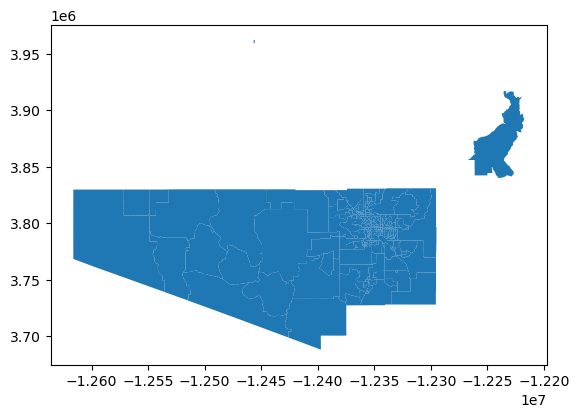

In [43]:
display(state[state['precinct'].str.contains('pima')].head(20))
display(vote[vote['precinct'].str.contains('pima')].head(20))
display(state['totalVotes'].value_counts())
display(racial_demographics[racial_demographics['precinct'].str.contains('pima')])
display(state[state['precinct'].str.contains('pima')].plot())

<AxesSubplot: >

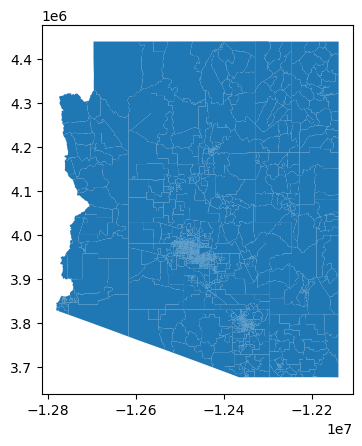

In [44]:
display(state.plot()) #spot check the geometry

In [45]:
#Population Error Checking
total_pop_calc = state['totalPop'].sum()
total_pop_raw = racial_demographics['totalPop'].sum()
pop_error = (total_pop_calc - total_pop_raw)/total_pop_raw *100
display('Total Population Calculated: '+str(total_pop_calc))
display('Total Population Raw: '+str(total_pop_raw))
display('Percent Error: %'+str(pop_error))
display(state['precinct'][state['totalPop'] == 0])
#display(state[state['precinct'].str.contains('pima')])
#display(racial_demographics[racial_demographics['NAME'].str.contains('Pima')])

'Total Population Calculated: 7151502'

'Total Population Raw: 7151502'

'Percent Error: %0.0'

80      voting districts not defined
124             san carlos community
384                         pleasant
1129               south mtn park ne
1134               south mtn park sw
1213            south mtn park south
1310               south mtn park se
1311             south mtn park east
Name: precinct, dtype: object

In [46]:
#Vote Error Checking
total_vote_calc = state['totalVotes'].sum()
total_vote_raw = vote['votes'][vote['party_simplified'] == 'DEMOCRAT'].sum() + vote['votes'][vote['party_simplified'] == 'REPUBLICAN'].sum()
vote_error = (total_vote_calc - total_vote_raw)/total_vote_raw *100
display('Total Vote Calculated: '+str(total_vote_calc))
display('Total Vote Raw: '+str(total_vote_raw))   
display('Percent Error: %'+str(vote_error))
#display(state['precinct'][state['totalVotes'] == 0])
#display(state)
#display(state[state['precinct'].str.contains('alpine')])
#display(vote[vote['precinct'].str.contains('alpine')])
#display(state[state['totalVotes'] == 0].head(30))
#display(state.sort_values(by = 'totalVotes', ascending = False).head(50))
#display(state[state['precinct'].str.contains('pima')])
#display(vote[vote['precinct'].str.contains('27')].head(30))

'Total Vote Calculated: 2873401'

'Total Vote Raw: 3267834'

'Percent Error: %-12.070166354839323'

Import Current Districting

,LONGNAME,SHORTNAME,DISTRICT,COLOR,TOTAL,TARGET_DEV,CompDemVot,CompRepVot,Pres2020_D,Sen2020_DE,Gov2018_DE,AtG2018_DE,Mine2018_D,SecState20,Sen2018_DE,SuptEd2018,Treas2018_,Pres2016_D,POPULATION,OMB_LATINO,OMB_NH_WHT,OMB_BLK_P,OMB_ASNPI_,OMB_NATIVE,ST1519_M2_,ST1519_M21,ST1519_M22,ST1519_M23,ST1519_M24,ST1519_M25,G_AINH18,G_AINH18_P,TOTAL18,geometry
0,District 1,D1,1,-16777088,794611,0.0,48.70,51.30,50.76,50.76,41.43,46.41,46.52,49.56,50.91,50.67,43.38,47.77,794611,16.35,69.89,3.85,5.77,2.41,608665,11.28,79.81,3.26,1.93,3.52,9198,1.41,650548,"POLYGON ((-111.97848 33.46567, -111.97890 33.4..."
1,District 2,D2,2,7405440,794612,0.0,46.40,53.60,45.95,47.33,40.02,45.31,46.16,47.40,48.20,48.76,43.89,44.46,794612,16.86,55.28,2.50,1.89,21.86,593135,13.68,61.66,2.31,20.70,1.39,115094,18.31,628519,"POLYGON ((-111.03999 33.46602, -111.03992 33.4..."
2,District 3,D3,3,950534272,794612,0.0,76.46,23.54,75.72,76.71,70.69,75.44,76.12,77.31,79.03,78.01,73.17,76.91,794612,62.60,19.57,10.82,3.23,2.42,433659,50.55,30.90,12.14,3.11,2.89,11857,2.09,568035,"POLYGON ((-112.09965 33.53140, -112.09966 33.5..."
3,District 4,D4,4,1275097984,794611,0.0,53.51,46.49,55.25,56.02,46.66,51.19,51.78,54.16,55.84,55.55,48.53,51.40,794611,26.74,55.16,6.25,6.98,3.11,567091,18.83,68.00,6.10,2.79,3.93,13036,2.07,628965,"POLYGON ((-111.97879 33.43652, -111.97880 33.4..."
4,District 5,D5,5,-5635968,794612,0.0,40.97,59.02,41.74,42.76,34.70,39.31,39.43,41.90,43.15,43.53,37.02,38.45,794612,17.75,67.06,4.36,7.35,1.76,502662,14.36,75.95,3.56,1.26,4.63,4349,0.74,584092,"POLYGON ((-111.89263 33.29224, -111.89131 33.2..."
5,District 6,D6,6,-65408,794611,0.0,48.81,51.18,50.05,50.50,41.86,48.81,47.19,49.95,48.73,50.59,45.35,47.18,794611,24.74,63.14,4.04,4.21,2.00,592361,21.18,70.49,3.40,1.64,2.98,5640,0.88,642434,"POLYGON ((-110.97817 32.29419, -110.97828 32.2..."
6,District 7,D7,7,1934360704,794611,0.0,67.71,32.29,66.61,68.14,61.79,68.25,67.25,68.91,68.13,69.42,65.00,68.03,794611,59.81,28.46,4.34,2.57,3.57,515833,50.94,38.26,4.46,3.86,2.22,16842,2.80,601175,"POLYGON ((-110.45993 31.42809, -110.45993 31.4..."
7,District 8,D8,8,-9183360,794610,-0.0,42.37,57.63,43.15,44.51,34.69,40.62,40.88,43.39,44.93,44.66,38.10,39.90,794610,21.14,64.30,5.29,5.55,2.07,562017,15.18,75.20,4.30,1.41,3.67,6149,0.98,628985,"POLYGON ((-112.31730 33.63872, -112.31736 33.6..."
8,District 9,D9,9,-171798694,794612,0.0,37.00,63.00,36.92,38.92,30.61,35.99,36.08,37.72,38.82,38.84,34.28,34.46,794612,29.89,57.46,4.99,3.37,2.51,534809,22.12,68.33,4.87,1.98,2.47,7308,1.20,609223,"POLYGON ((-112.29870 33.60520, -112.29871 33.6..."


c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


,geometry,geoid,NAME,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,county,demVotes,repVotes,totalVotes,district
0,"POLYGON ((-12767174.951 4252756.034, -12767132...",04015000209,"DOLAN SPRINGS, Mohave County, Arizona",1857,16,1329,372,15,14,dolan springs,Mohave County,0,0,0,9
1,"POLYGON ((-12764337.461 4225677.685, -12764331...",04015000211,"BULLHEAD CITY, Mohave County, Arizona",41878,553,28420,9960,585,346,bullhead city,Mohave County,0,0,0,9
2,"POLYGON ((-12696056.514 4439130.190, -12695993...",04015000221,"LITTLEFIELD, Mohave County, Arizona",3175,18,2228,799,13,45,littlefield,Mohave County,0,0,0,9
3,"POLYGON ((-12560122.887 4439178.791, -12559487...",04015000223,"MOCCASIN, Mohave County, Arizona",276,6,66,16,1,178,moccasin,Mohave County,0,0,0,2
4,"POLYGON ((-12702961.835 4201596.146, -12702947...",04015000216,"KINGMAN NORTH, Mohave County, Arizona",12214,95,9647,1565,87,157,kingman north,Mohave County,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,"POLYGON ((-12759814.935 3955888.761, -12759764...",04012000060,"60, La Paz County, Arizona",775,8,446,270,4,6,60,La Paz County,0,0,0,9
1534,"POLYGON ((-12750074.111 4019233.348, -12750070...",04012000052,"52, La Paz County, Arizona",1044,0,61,440,4,521,52,La Paz County,0,0,0,9
1535,"POLYGON ((-12738754.580 4040541.004, -12738665...",04012000051,"51, La Paz County, Arizona",5995,63,1658,2232,43,1741,51,La Paz County,0,0,0,9
1536,"POLYGON ((-12715916.465 4053996.723, -12715695...",04012000054,"54, La Paz County, Arizona",2355,11,1895,277,25,45,54,La Paz County,0,0,0,9


,geometry,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,demVotes,repVotes,totalVotes
district,,,,,,,,,,
1,"POLYGON ((-12476959.431 3964639.070, -12476958...",784753,24880,546099,130424,35540,12745,221755,219701,441456
2,"POLYGON ((-12490382.183 3889254.222, -12490381...",814640,17073,451607,139429,9746,162861,88473,85697,174170
3,"POLYGON ((-12492696.225 3945612.992, -12492863...",817560,82899,161739,509125,21379,16141,176335,51612,227947
4,"POLYGON ((-12459996.723 3933982.250, -12460665...",783490,41115,431105,210770,43009,17475,190649,158102,348751
5,"POLYGON ((-12444831.575 3922510.945, -12445076...",795784,27945,534214,139641,47325,6176,163805,242745,406550
6,"MULTIPOLYGON (((-12359385.259 3748197.756, -12...",778797,26006,490754,193530,23152,6937,201210,181421,382631
7,"POLYGON ((-12354044.367 3750108.169, -12354055...",793281,29736,233495,467261,15315,23700,165193,104822,270015
8,"POLYGON ((-12501202.792 3970608.188, -12501247...",789363,34037,512649,163596,34785,8086,169922,236598,406520
9,"POLYGON ((-12761111.830 3845737.452, -12761163...",793834,33470,454885,238477,18586,9809,93476,121885,215361


<AxesSubplot: >

<AxesSubplot: >

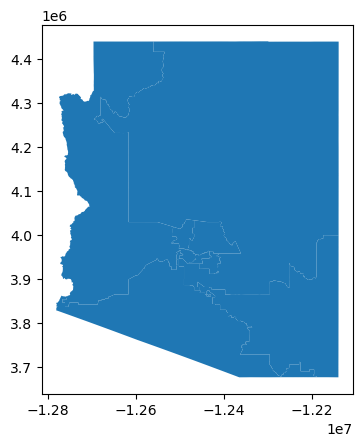

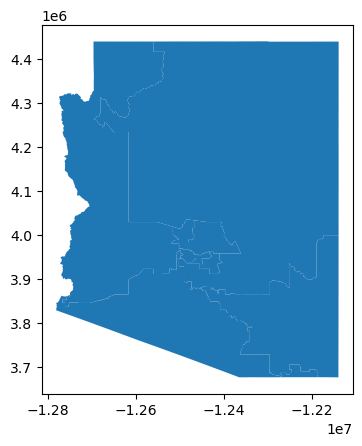

In [47]:
display(current_districting)
current_districting['geometry'] = current_districting['geometry'].to_crs(3857)
def assign_district(precinct_geo):
    inter = current_districting[current_districting.intersects(precinct_geo)]
    #inter = current_districting[current_districting.overlay(precinct_geo)]
    #display(inter)
                                
    return inter['DISTRICT'].min()

#def assign_area(geometry):
    

#def assign_district(geoid):
#    precincts = inter[inter['GEO_ID'] == geoid]
#    max_i = precincts['area'].max()
#    return precincts[precincts['area'] == max_i]['DISTRICT'].min()
    
inter = current_districting.overlay(state)
inter['area'] = inter.area
#display(inter)
#state['district'] = state['geometry'].apply(assign_district)
state['district'] = maup.assign(state, current_districting)
state['district'] = state['district'] + 1
display(state)
#display(state['district'].unique())
dist = state.dissolve(by = 'district', aggfunc = 'sum')
display(dist)
display(dist.plot())
display(current_districting.plot())

In [48]:
prec_mapping = state['district'].to_dict()
display(prec_mapping)
dist_mapping = dict()
for i in range (1, SEATS+1):
    dist_mapping[i] = set()
for precinct_id in prec_mapping:
    dist_mapping[prec_mapping[precinct_id]].add(precinct_id)
display(dist_mapping)

{0: 9,
 1: 9,
 2: 9,
 3: 2,
 4: 9,
 5: 9,
 6: 9,
 7: 9,
 8: 2,
 9: 9,
 10: 9,
 11: 9,
 12: 9,
 13: 9,
 14: 9,
 15: 9,
 16: 9,
 17: 9,
 18: 9,
 19: 9,
 20: 9,
 21: 9,
 22: 9,
 23: 9,
 24: 7,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 2,
 66: 2,
 67: 2,
 68: 6,
 69: 6,
 70: 6,
 71: 7,
 72: 6,
 73: 7,
 74: 6,
 75: 6,
 76: 7,
 77: 9,
 78: 9,
 79: 9,
 80: 9,
 81: 6,
 82: 2,
 83: 2,
 84: 6,
 85: 2,
 86: 7,
 87: 7,
 88: 2,
 89: 6,
 90: 2,
 91: 6,
 92: 2,
 93: 6,
 94: 6,
 95: 2,
 96: 6,
 97: 2,
 98: 7,
 99: 2,
 100: 2,
 101: 2,
 102: 2,
 103: 2,
 104: 6,
 105: 6,
 106: 6,
 107: 6,
 108: 6,
 109: 2,
 110: 2,
 111: 2,
 112: 2,
 113: 6,
 114: 6,
 115: 2,
 116: 2,
 117: 6,
 118: 6,
 119: 2,
 120: 2,
 121: 6,
 122: 2,
 12

{1: {723,
  724,
  728,
  734,
  735,
  738,
  739,
  748,
  750,
  751,
  752,
  754,
  755,
  756,
  757,
  758,
  759,
  765,
  770,
  771,
  774,
  780,
  783,
  784,
  785,
  787,
  788,
  791,
  794,
  798,
  804,
  807,
  838,
  839,
  841,
  845,
  852,
  853,
  855,
  856,
  857,
  858,
  859,
  860,
  861,
  862,
  869,
  870,
  874,
  875,
  878,
  879,
  882,
  887,
  889,
  890,
  893,
  894,
  897,
  899,
  903,
  917,
  918,
  920,
  921,
  924,
  925,
  928,
  929,
  930,
  932,
  933,
  935,
  939,
  940,
  941,
  944,
  960,
  978,
  979,
  981,
  982,
  983,
  986,
  987,
  988,
  990,
  991,
  992,
  993,
  995,
  996,
  997,
  998,
  1001,
  1003,
  1004,
  1006,
  1010,
  1011,
  1012,
  1015,
  1016,
  1019,
  1020,
  1021,
  1023,
  1025,
  1026,
  1027,
  1028,
  1035,
  1036,
  1049,
  1078,
  1079,
  1080,
  1081,
  1082,
  1083,
  1084,
  1085,
  1086,
  1087,
  1088,
  1091,
  1092,
  1121,
  1128,
  1154,
  1155,
  1157,
  1158,
  1160,
  1161,
  1163,
  1

Exporting State Data

In [49]:
state.drop(['NAME','county'], axis = 1, inplace=True)
display(state)
state.to_file('data/Arizona/arizonaGeo.json', driver='GeoJSON', index = True)
noGeo = pd.DataFrame(state.drop(columns='geometry'))
noGeo.to_json('data/Arizona/arizona.json', orient = 'index', compression = 'infer', index = True, indent = 4)
#with open('data/Arizona/currentDist.json', 'w', encoding='utf-8') as file:
#    json.dump(dist_mapping, file, ensure_ascii=False, indent=4)

,geometry,geoid,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct,demVotes,repVotes,totalVotes,district
0,"POLYGON ((-12767174.951 4252756.034, -12767132...",04015000209,1857,16,1329,372,15,14,dolan springs,0,0,0,9
1,"POLYGON ((-12764337.461 4225677.685, -12764331...",04015000211,41878,553,28420,9960,585,346,bullhead city,0,0,0,9
2,"POLYGON ((-12696056.514 4439130.190, -12695993...",04015000221,3175,18,2228,799,13,45,littlefield,0,0,0,9
3,"POLYGON ((-12560122.887 4439178.791, -12559487...",04015000223,276,6,66,16,1,178,moccasin,0,0,0,2
4,"POLYGON ((-12702961.835 4201596.146, -12702947...",04015000216,12214,95,9647,1565,87,157,kingman north,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,"POLYGON ((-12759814.935 3955888.761, -12759764...",04012000060,775,8,446,270,4,6,60,0,0,0,9
1534,"POLYGON ((-12750074.111 4019233.348, -12750070...",04012000052,1044,0,61,440,4,521,52,0,0,0,9
1535,"POLYGON ((-12738754.580 4040541.004, -12738665...",04012000051,5995,63,1658,2232,43,1741,51,0,0,0,9
1536,"POLYGON ((-12715916.465 4053996.723, -12715695...",04012000054,2355,11,1895,277,25,45,54,0,0,0,9


Computing Adjacency Graph Functions

In [50]:
def generate_adj(precinct, state):
    return 0

def addEdge(edges, index1, index2):
    if(index1 < index2):
        edges.add((int(index1),int(index2)))
    if(index1 > index2):
        edges.add((int(index2),int(index1)))

Computing Adjacency Graph

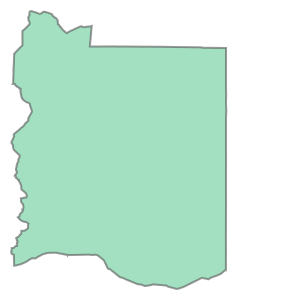

array([27, 56, 58], dtype=int64)

{(373, 394),
 (1313, 1361),
 (158, 177),
 (932, 995),
 (708, 1138),
 (991, 1081),
 (255, 375),
 (449, 469),
 (630, 1484),
 (275, 353),
 (691, 1314),
 (650, 1462),
 (826, 1130),
 (8, 9),
 (842, 958),
 (859, 1307),
 (40, 41),
 (1099, 1288),
 (159, 178),
 (299, 301),
 (640, 1497),
 (2, 423),
 (291, 297),
 (498, 510),
 (646, 1428),
 (531, 544),
 (337, 413),
 (476, 608),
 (442, 466),
 (603, 1466),
 (692, 1315),
 (841, 1258),
 (886, 1409),
 (148, 168),
 (787, 878),
 (132, 160),
 (973, 1005),
 (351, 613),
 (499, 1494),
 (872, 873),
 (224, 243),
 (497, 667),
 (572, 581),
 (885, 892),
 (1003, 1176),
 (86, 687),
 (1335, 1357),
 (635, 637),
 (842, 850),
 (106, 107),
 (357, 363),
 (524, 540),
 (1384, 1398),
 (616, 623),
 (96, 99),
 (748, 779),
 (1202, 1278),
 (1060, 1423),
 (107, 108),
 (587, 1499),
 (916, 1409),
 (485, 1488),
 (737, 769),
 (617, 624),
 (657, 660),
 (1016, 1087),
 (1449, 1500),
 (699, 1151),
 (724, 1324),
 (988, 1025),
 (1146, 1233),
 (904, 1291),
 (1532, 1534),
 (936, 1280),
 (43

4774

In [51]:
edges = set()
testi = 57
display(state['geometry'][testi])
touch = state['geometry'].touches(state['geometry'][testi])
statesubset = state[touch]
display(statesubset.index.values)

for i in state.index:
    touch = state['geometry'].touches(state['geometry'][i])
    statesubset = state[touch]
    for j in statesubset.index.values:
        addEdge(edges, i, j)

display(edges)
display(len(edges))

Edge Spot Check

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

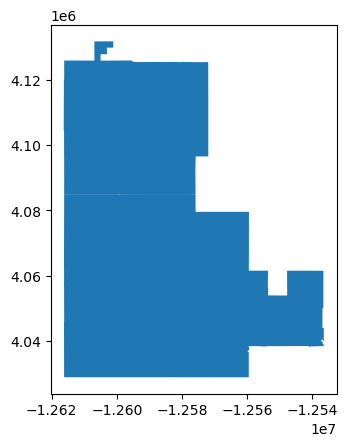

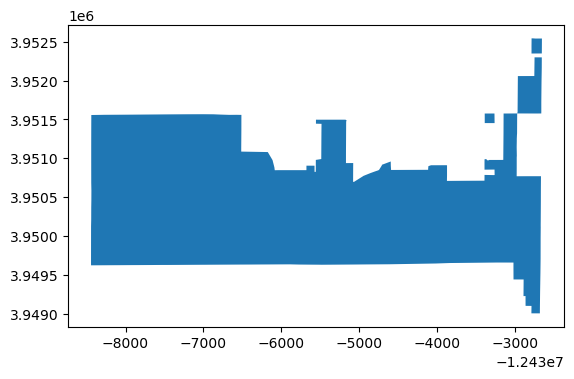

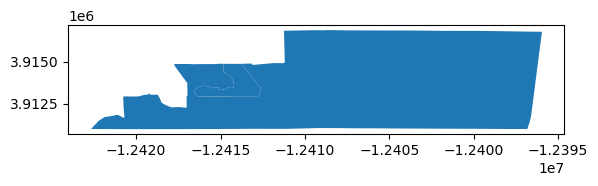

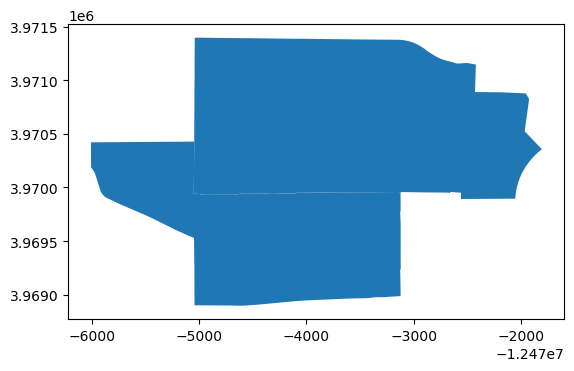

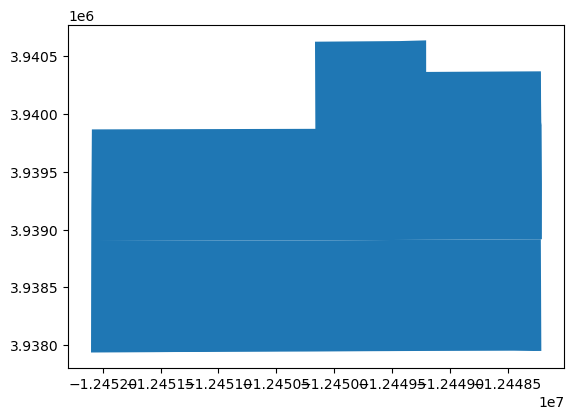

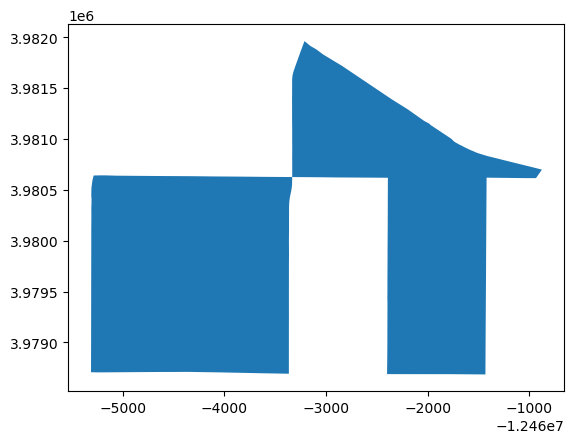

In [52]:
edge_index = 0
for edge in edges:
    display(state.iloc[list(edge)].plot())
    edge_index = edge_index + 1
    if(edge_index > 5):
        break

Edge Error Checking

In [53]:
missing_index = set()
found = False
for i in state.index:
    found = False
    for j in edges:
        if(i in j):
            found = True
            break
    if(not found):
        missing_index.add(i)
display(len(missing_index))
display(missing_index)
for precinct_index in missing_index:
    display(state.iloc[[precinct_index]])
    display(state.iloc[[precinct_index]].plot())

0

set()

Exporting Adjacency Graph Edges

In [54]:
edgeList = list(edges)
display(edgeList)
display(type(edgeList[0]))
display(type(edgeList[0][0]))
with open('data/Arizona/arizonaEdges.json', 'w', encoding='utf-8') as file:
    json.dump(edgeList, file, ensure_ascii=False, indent=4)

[(373, 394),
 (1313, 1361),
 (158, 177),
 (932, 995),
 (708, 1138),
 (991, 1081),
 (255, 375),
 (449, 469),
 (630, 1484),
 (275, 353),
 (691, 1314),
 (650, 1462),
 (826, 1130),
 (8, 9),
 (842, 958),
 (859, 1307),
 (40, 41),
 (1099, 1288),
 (159, 178),
 (299, 301),
 (640, 1497),
 (2, 423),
 (291, 297),
 (498, 510),
 (646, 1428),
 (531, 544),
 (337, 413),
 (476, 608),
 (442, 466),
 (603, 1466),
 (692, 1315),
 (841, 1258),
 (886, 1409),
 (148, 168),
 (787, 878),
 (132, 160),
 (973, 1005),
 (351, 613),
 (499, 1494),
 (872, 873),
 (224, 243),
 (497, 667),
 (572, 581),
 (885, 892),
 (1003, 1176),
 (86, 687),
 (1335, 1357),
 (635, 637),
 (842, 850),
 (106, 107),
 (357, 363),
 (524, 540),
 (1384, 1398),
 (616, 623),
 (96, 99),
 (748, 779),
 (1202, 1278),
 (1060, 1423),
 (107, 108),
 (587, 1499),
 (916, 1409),
 (485, 1488),
 (737, 769),
 (617, 624),
 (657, 660),
 (1016, 1087),
 (1449, 1500),
 (699, 1151),
 (724, 1324),
 (988, 1025),
 (1146, 1233),
 (904, 1291),
 (1532, 1534),
 (936, 1280),
 (43

tuple

int